# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [7]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")
# data = data.drop_duplicates(subset=["instance"])

## Extend the data by some additional information on the best values

In [8]:
# Find the best values for each instance as reference.
best_solutions = (
    data[["instance", "initial_sample_size", "optimized_sample_size"]]
    .groupby("instance")
    .min()
    .reset_index()
    .rename(
        columns={
            "initial_sample_size": "best_baseline",
            "optimized_sample_size": "best_lns_ub",
        }
    )
)
best_lb = (
    data[["instance", "lower_bound"]]
    .groupby("instance")
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lb"})
)
best_values = best_solutions.merge(best_lb, left_on="instance", right_on="instance")
# add them to the data as reference
data = data.merge(best_values, left_on="instance", right_on="instance")
data = data[data["baseline_alg"] == "FIDE-YASA(m=1)"]

## A look onto the data never hurts

In [9]:
data

,instance,#Variables,#Clauses,iteration_info,baseline_alg,initial_sample_path,initial_sample_size,lower_bound,optimized_sample_size,best_baseline,best_lns_ub,best_lb
5,BattleofTanks,144,769,"[{'nbrhd_tuples': 249, 'nbrhd_confs': 66, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/22_1_3_4_sample.csv,470,256,327,444,322,256
31,BattleofTanks,144,769,"[{'nbrhd_tuples': 247, 'nbrhd_confs': 59, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/22_1_3_3_sample.csv,470,256,331,444,322,256
36,BattleofTanks,144,769,"[{'nbrhd_tuples': 243, 'nbrhd_confs': 59, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/22_1_3_2_sample.csv,470,226,328,444,322,256
42,BattleofTanks,144,769,"[{'nbrhd_tuples': 246, 'nbrhd_confs': 61, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/22_1_3_5_sample.csv,470,256,340,444,322,256
51,BattleofTanks,144,769,"[{'nbrhd_tuples': 248, 'nbrhd_confs': 64, 'ite...",FIDE-YASA(m=1),2023-03-01_13-51-03/22_1_3_1_sample.csv,470,256,331,444,322,256
...,...,...,...,...,...,...,...,...,...,...,...,...
2309,eCos-3-0_i386pc,1245,3723,"[{'nbrhd_tuples': 184, 'nbrhd_confs': 1, 'iter...",FIDE-YASA(m=1),2023-03-01_13-51-03/42_1_3_5_sample.csv,77,25,49,66,45,33
2325,eCos-3-0_i386pc,1245,3723,"[{'nbrhd_tuples': 128, 'nbrhd_confs': 2, 'iter...",FIDE-YASA(m=1),2023-03-01_13-51-03/42_1_3_4_sample.csv,77,27,48,66,45,33
2332,eCos-3-0_i386pc,1245,3723,"[{'nbrhd_tuples': 119, 'nbrhd_confs': 1, 'iter...",FIDE-YASA(m=1),2023-03-01_13-51-03/42_1_3_2_sample.csv,77,25,51,66,45,33
2340,eCos-3-0_i386pc,1245,3723,"[{'nbrhd_tuples': 0, 'nbrhd_confs': 0, 'iterat...",FIDE-YASA(m=1),2023-03-01_13-51-03/42_1_3_1_sample.csv,77,31,47,66,45,33


The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [10]:
instance_infos = (
    data[["instance", "#Variables", "#Clauses"]]
    .drop_duplicates()
    .sort_values(by=["#Variables", "#Clauses"])
)
instance_infos

,instance,#Variables,#Clauses
654,calculate,9,15
521,lcm,9,16
1879,email,10,17
1390,ChatClient,14,20
116,toybox_2006-10-31_23-30-06,16,13
1446,car,16,33
2163,FeatureIDE,19,27
808,FameDB,22,40
162,APL,23,35
903,SafeBali,24,45


## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [11]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            "alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            if time > 900:
                return
            self.events["time"].append(time / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance"])
            self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["initial_sample_path"])
            self.events["initial_sample_size"].append(row["initial_sample_size"])
            self.events["y"].append(100 * (val / row["best_lb"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["initial_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["optimized_sample_size"],
            )


ec = EventCollector()
data[data["baseline_alg"] == "FIDE-YASA(m=1)"].sort_values(
    by=["#Variables", "#Clauses"]
).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [12]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

['EMBToolkit', 'financial_services']

## Plot the convergence for all other models.

In [13]:
solved_instances = [
    x for x in instance_infos["instance"].tolist() if x not in unsolved_instances
]

In [14]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [15]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

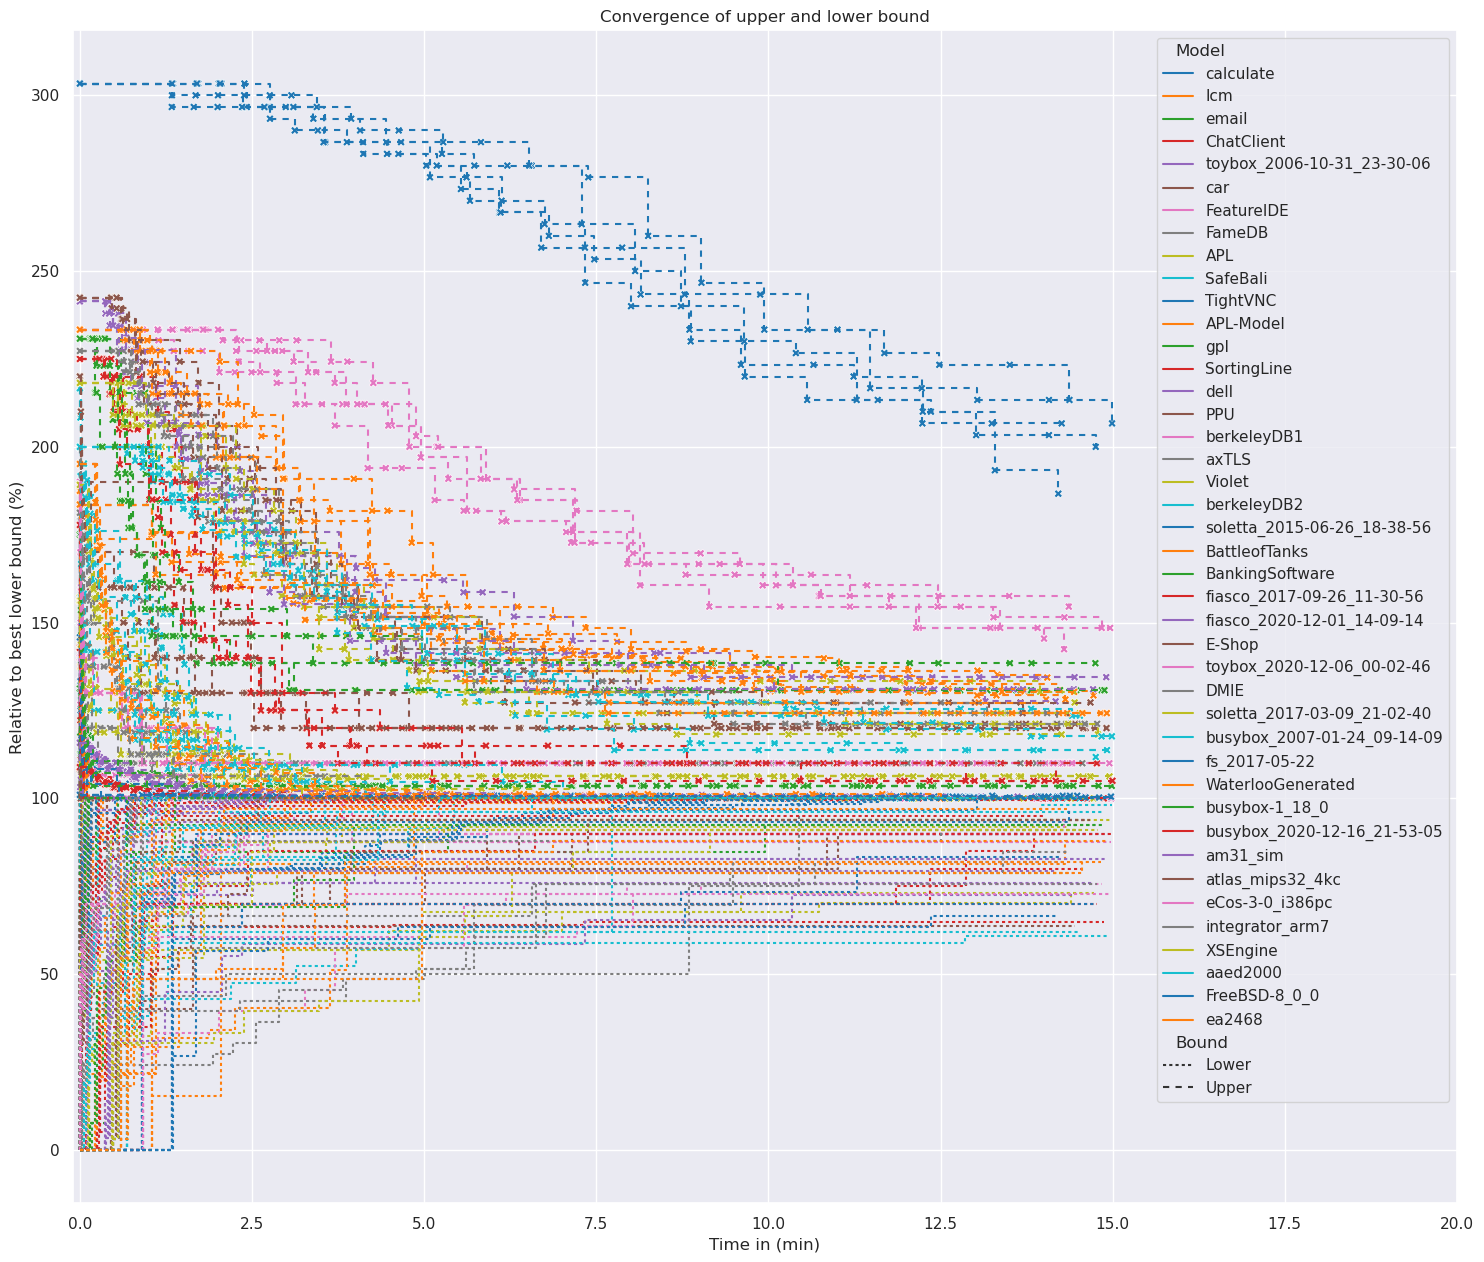

In [16]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

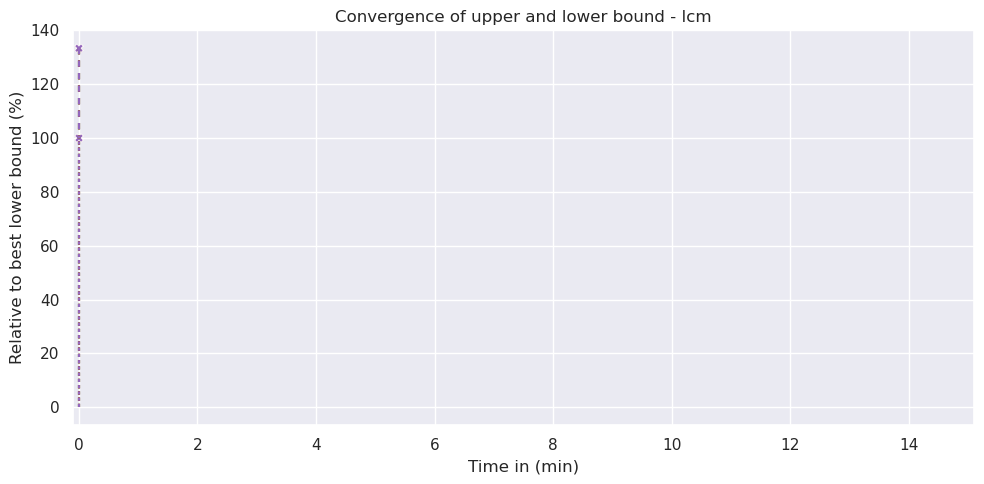

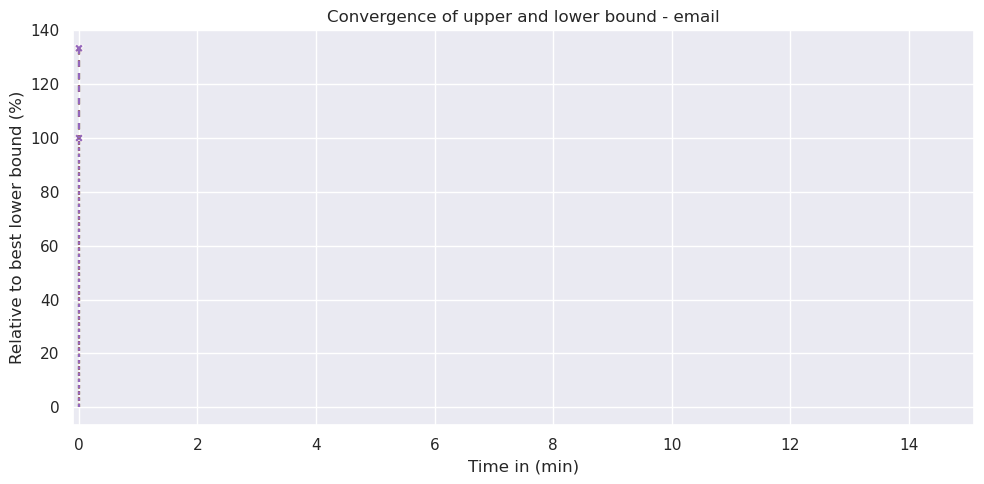

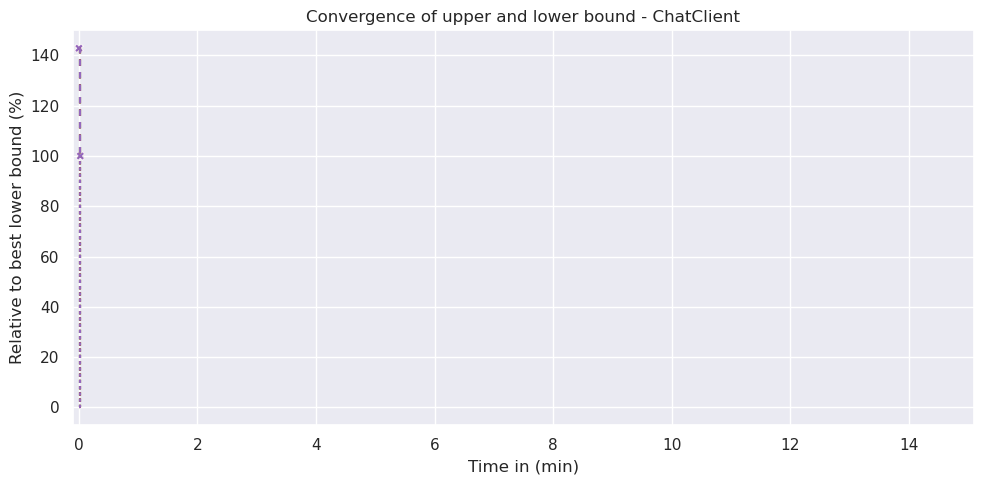

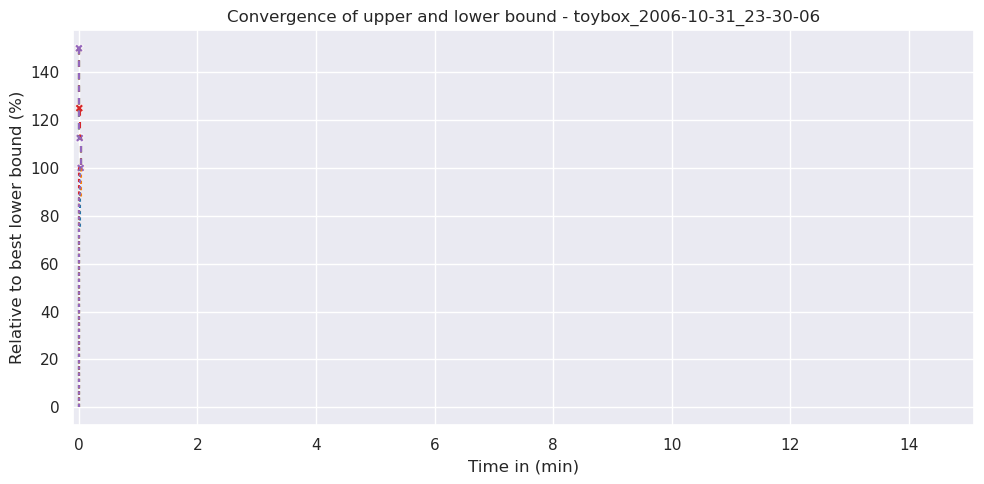

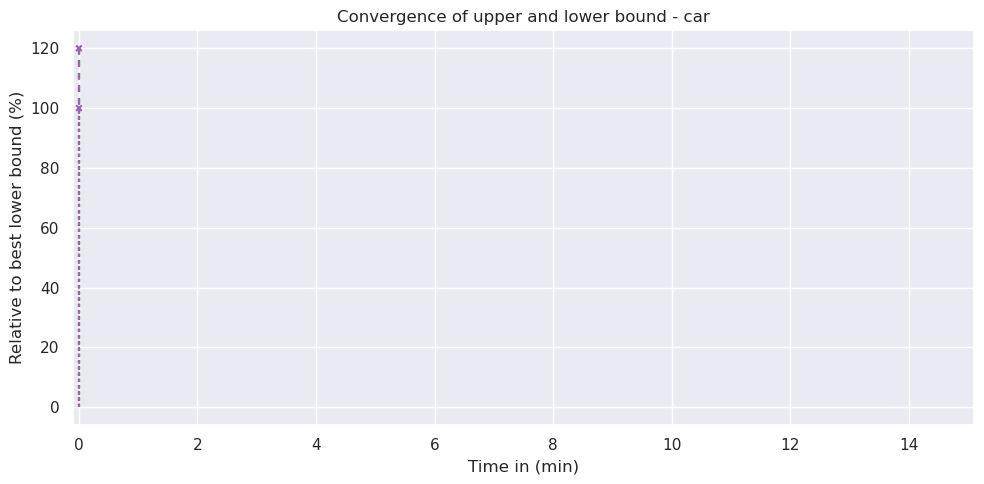

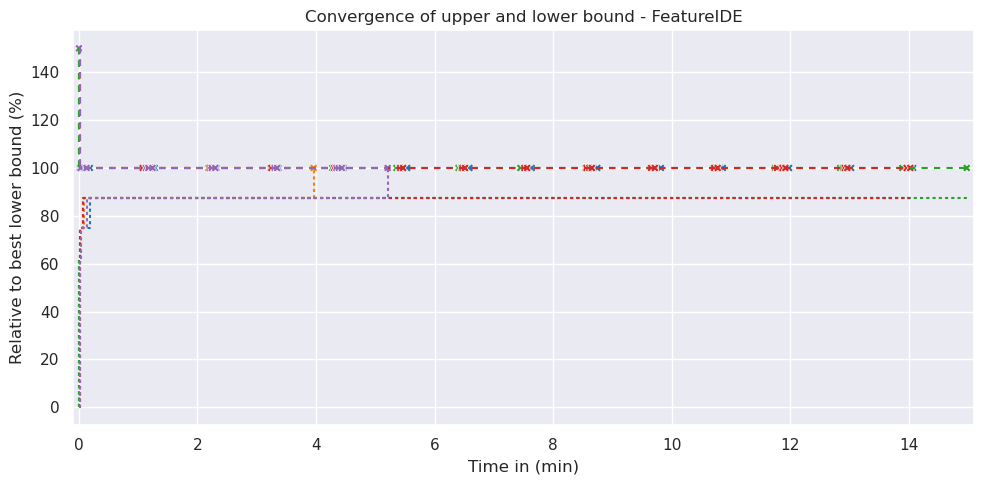

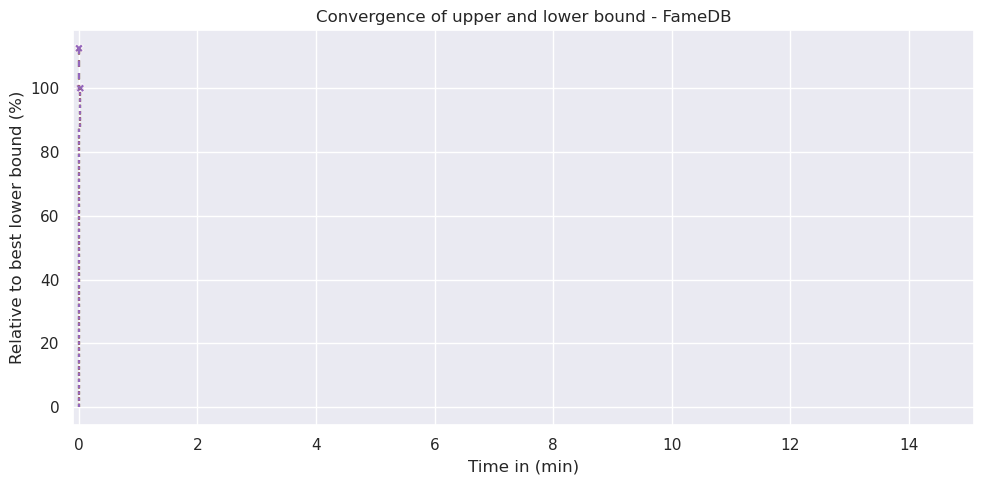

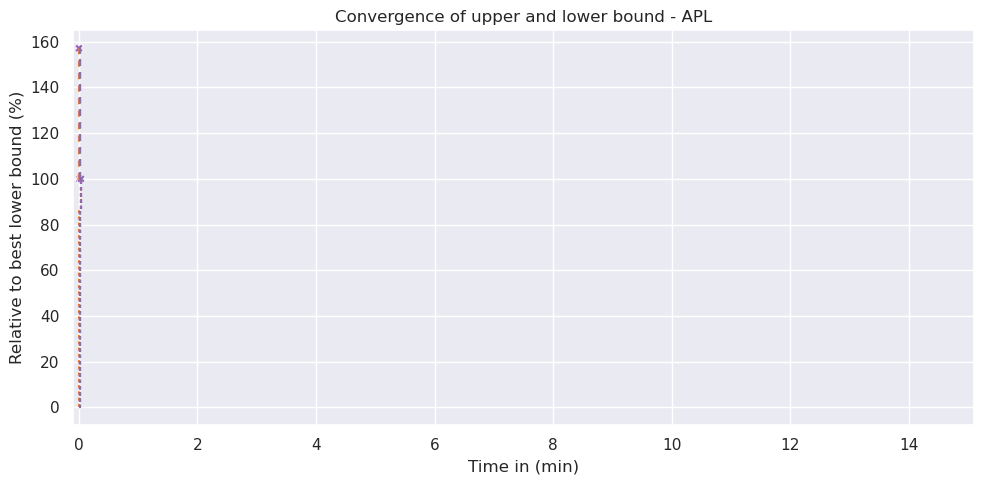

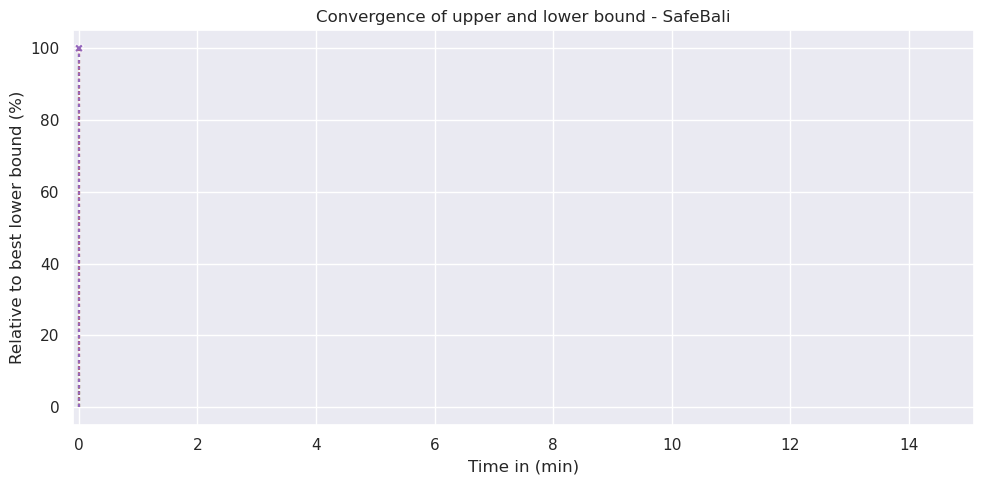

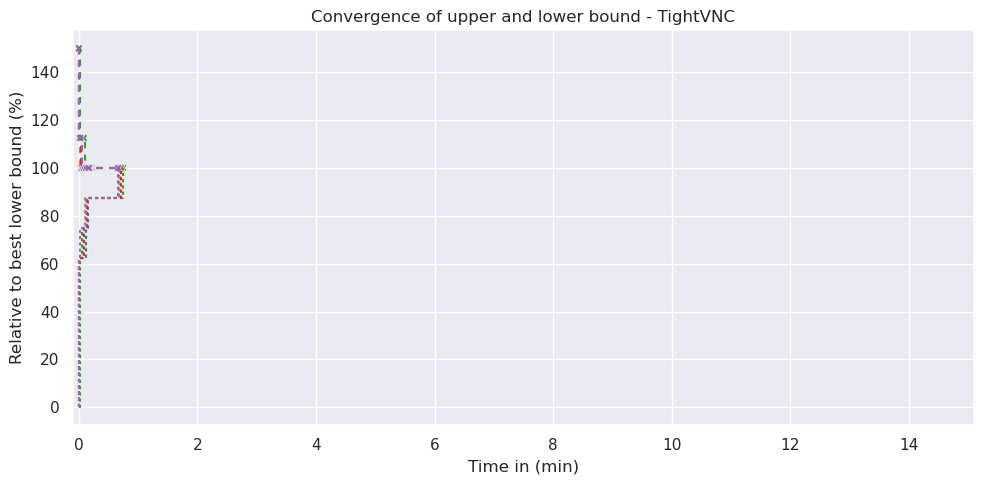

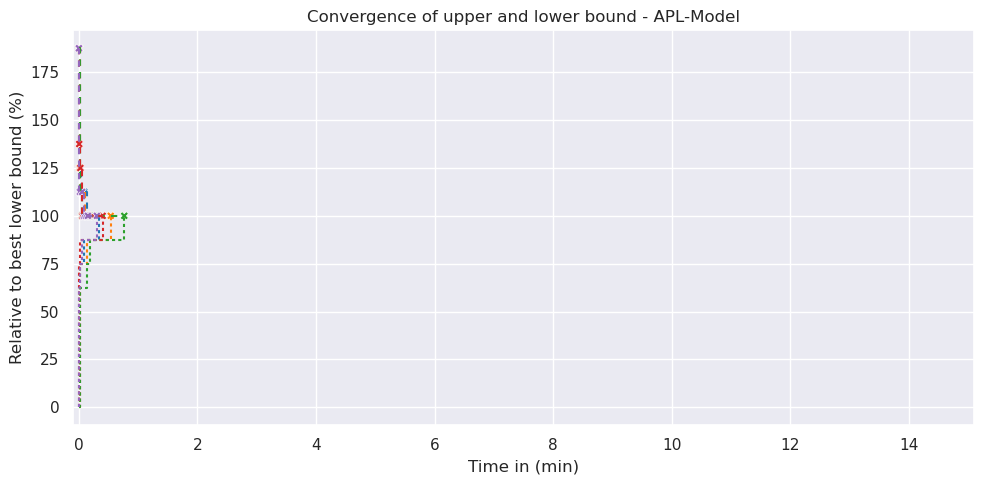

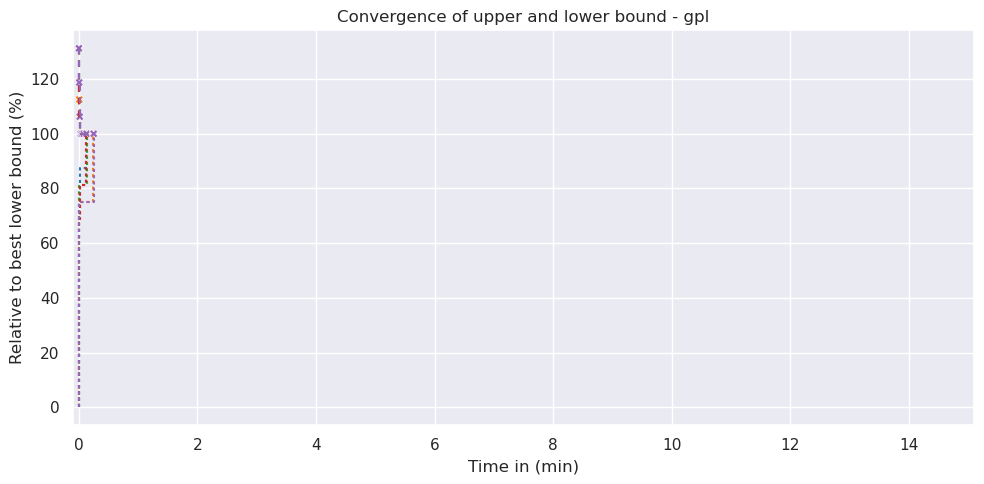

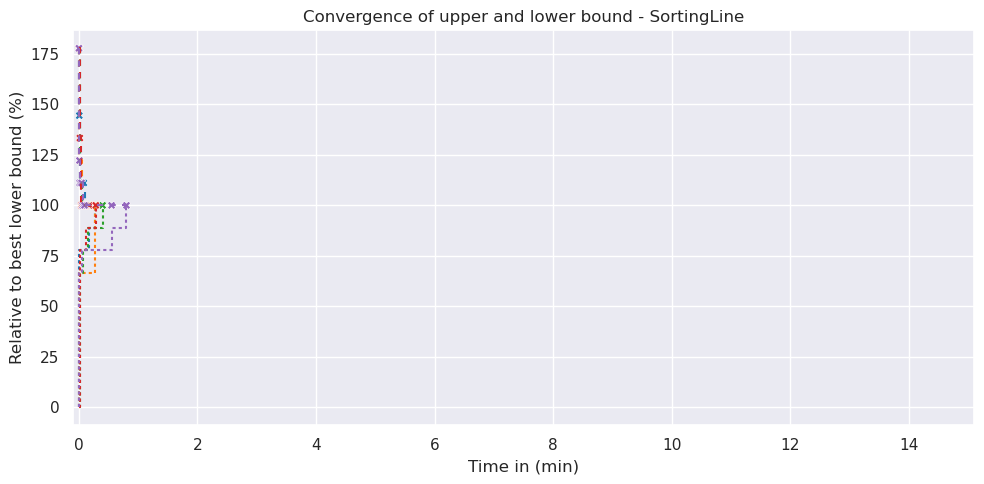

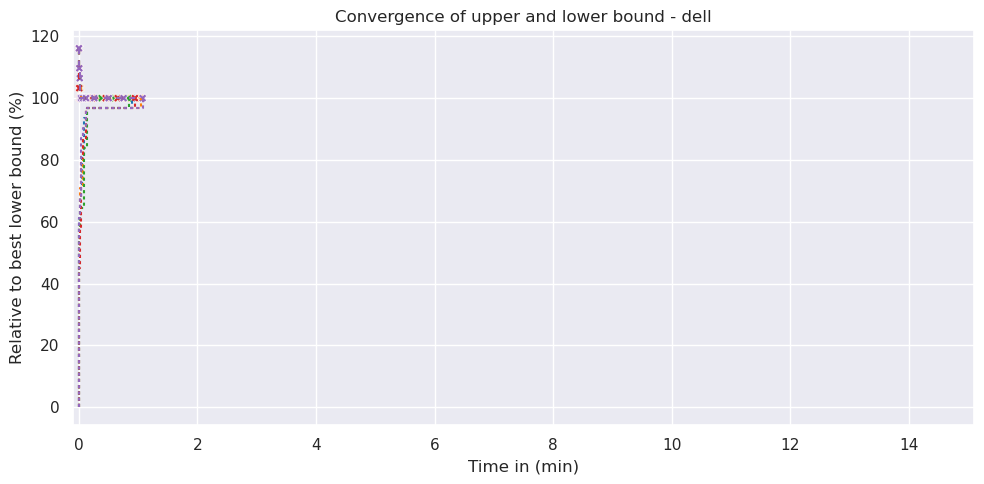

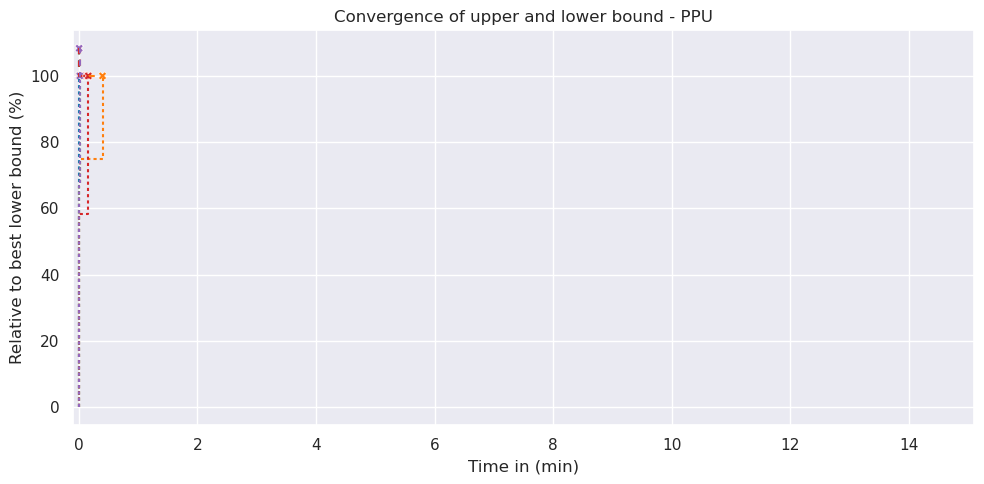

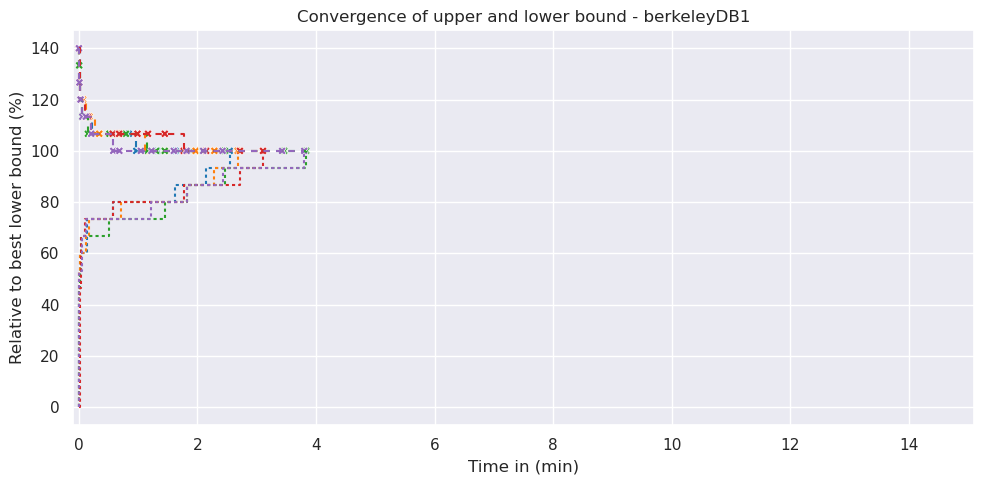

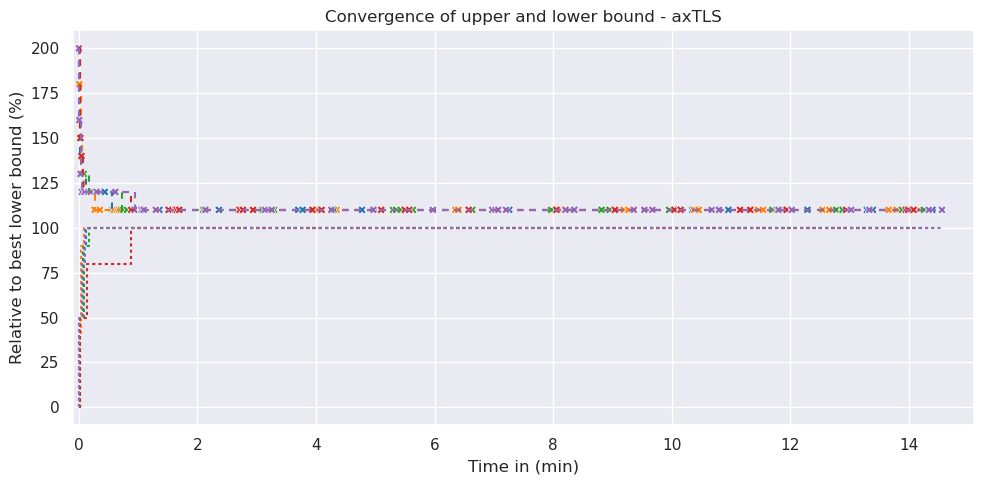

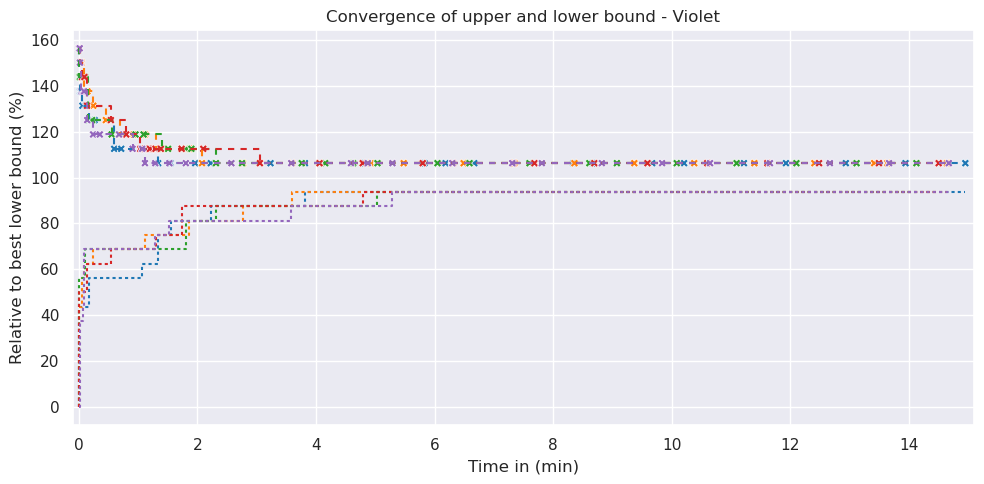

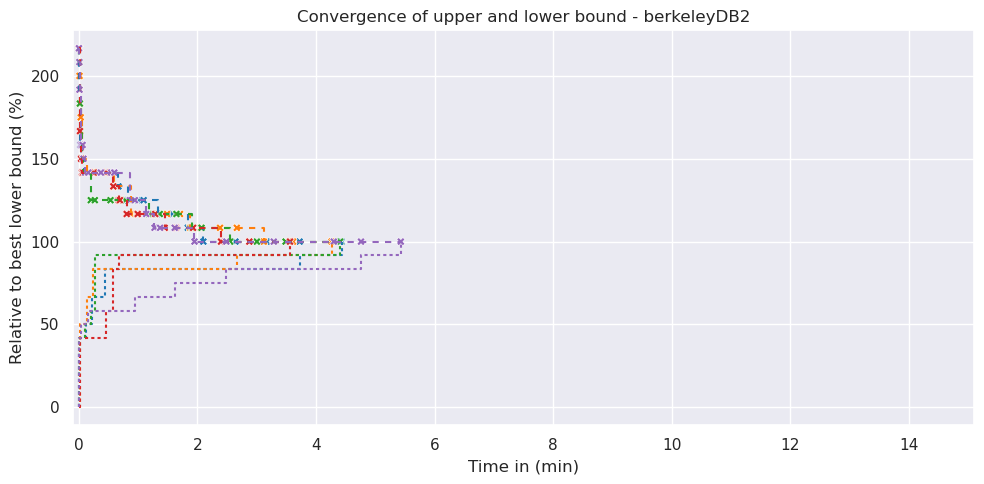

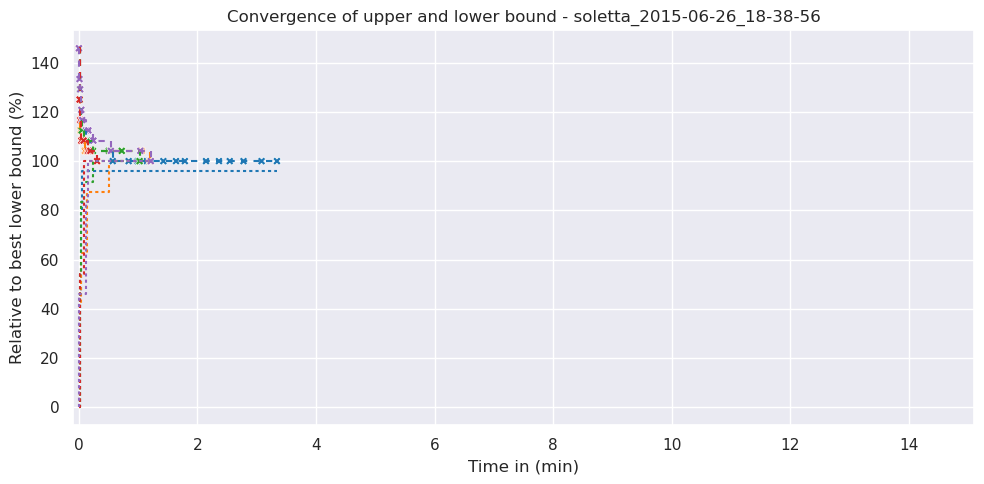

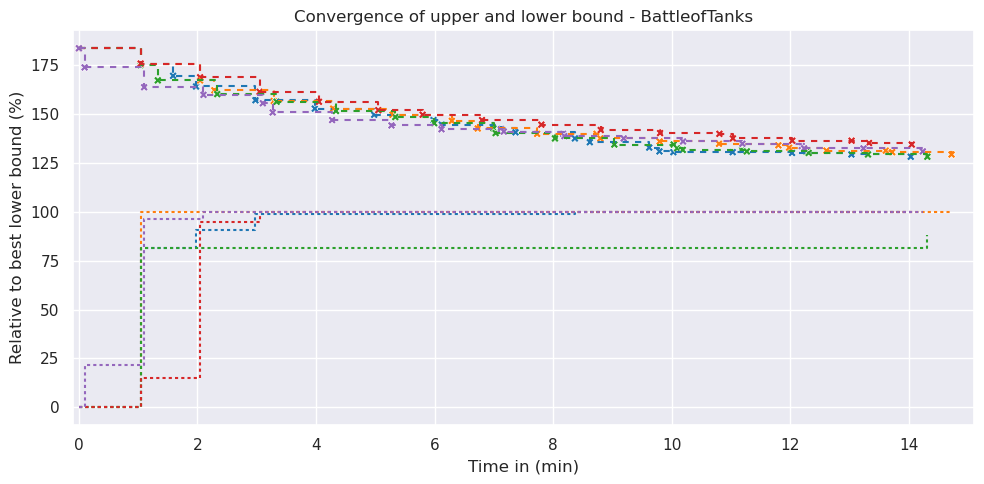

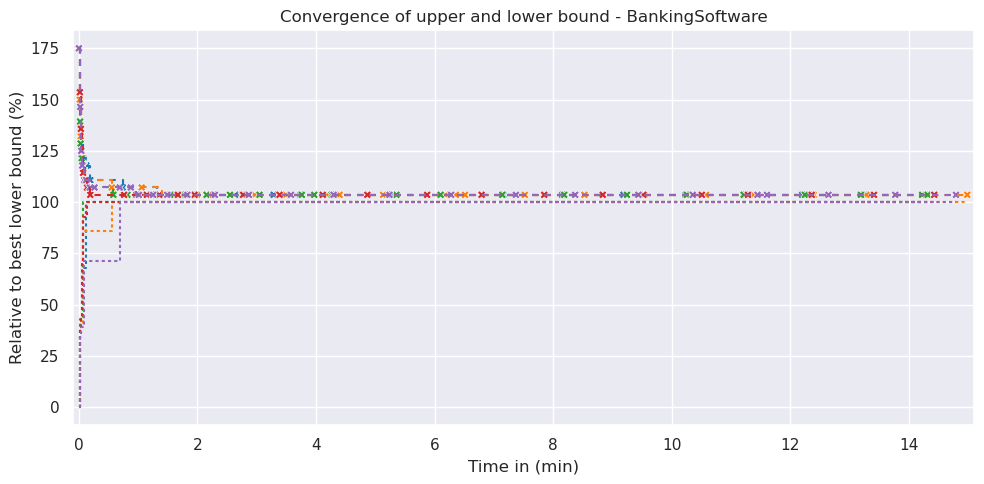

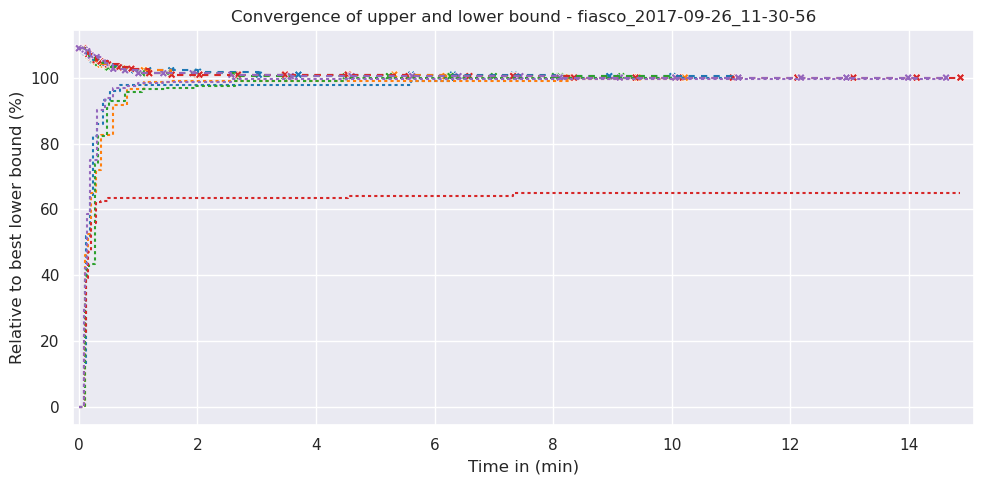

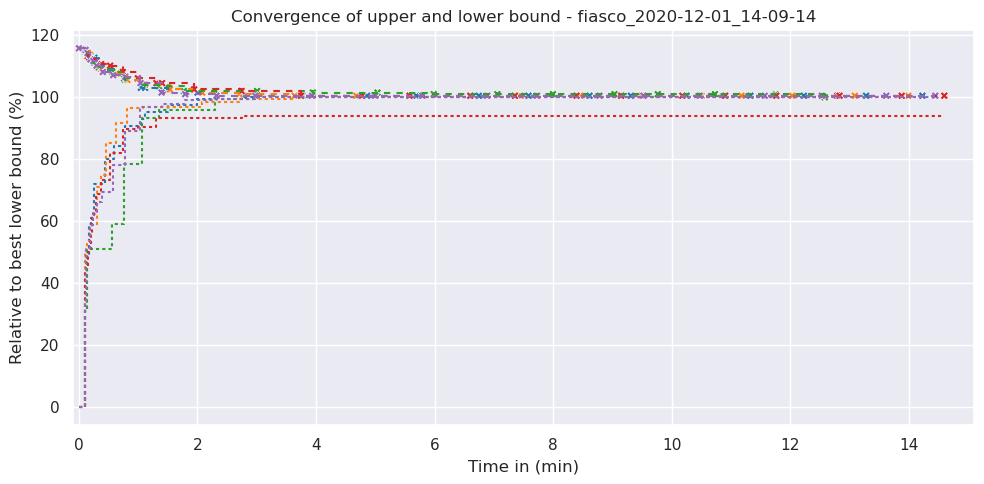

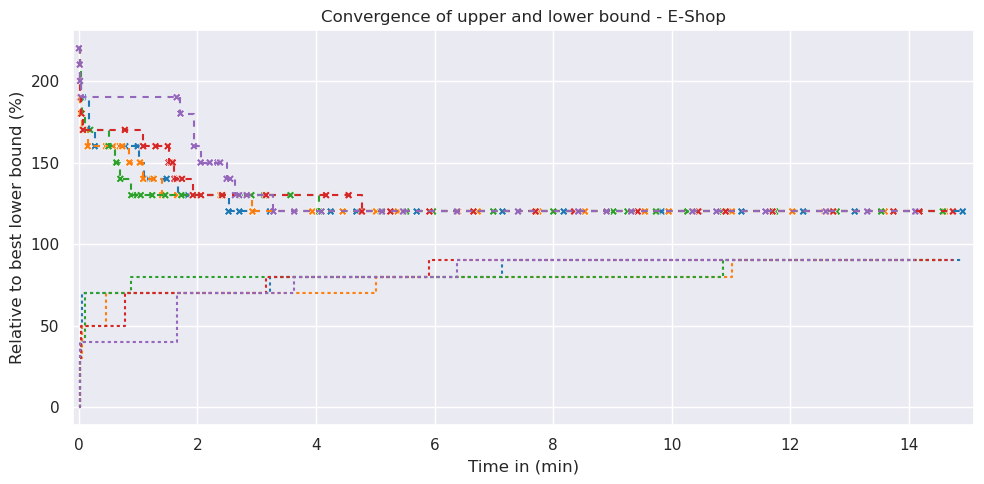

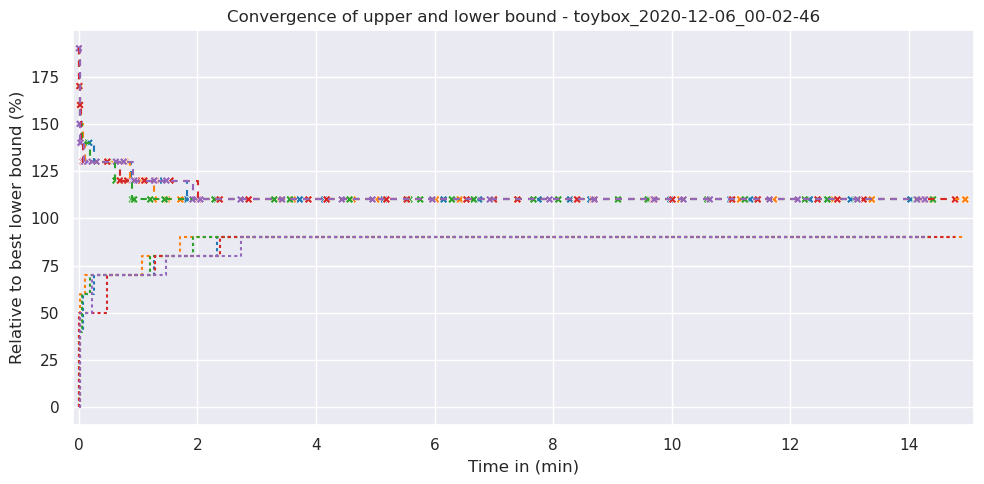

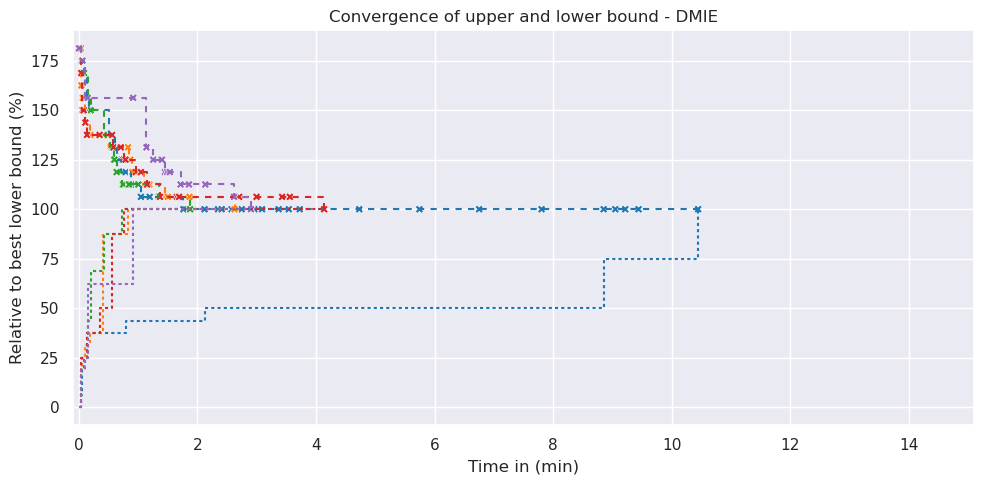

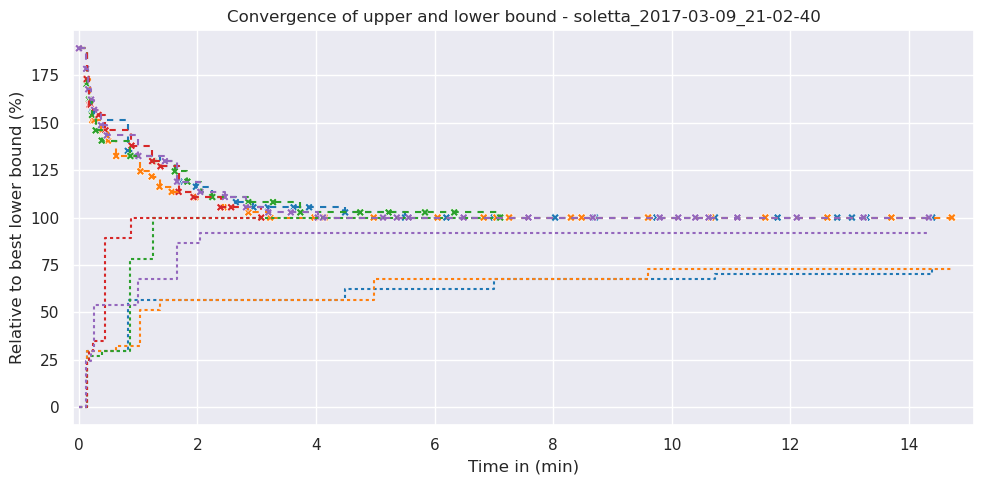

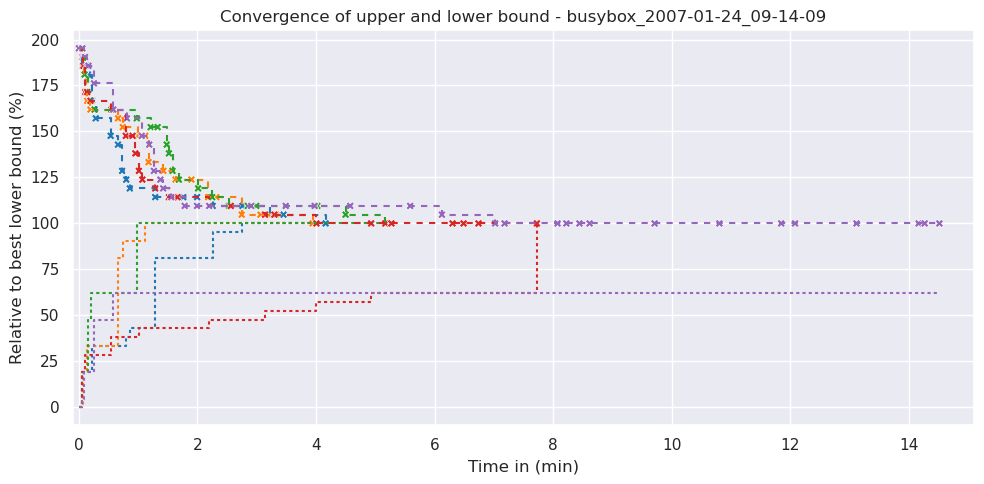

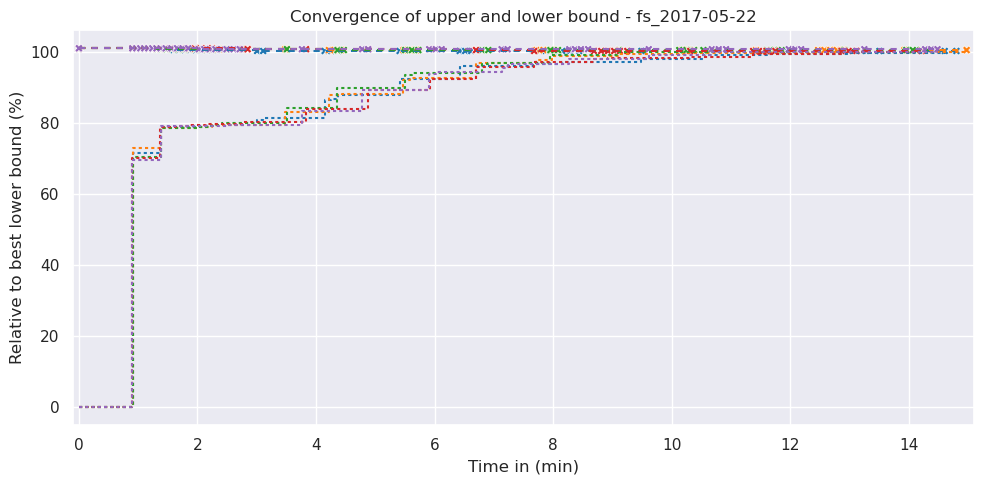

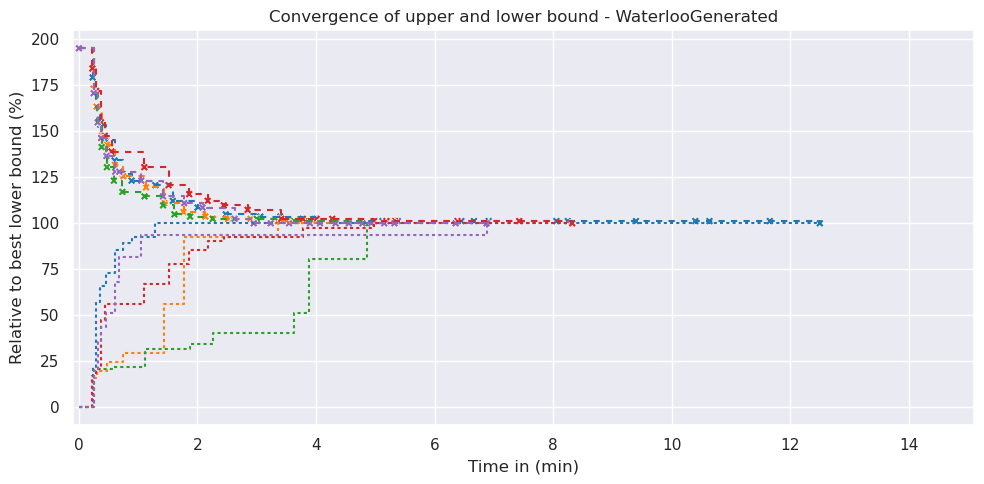

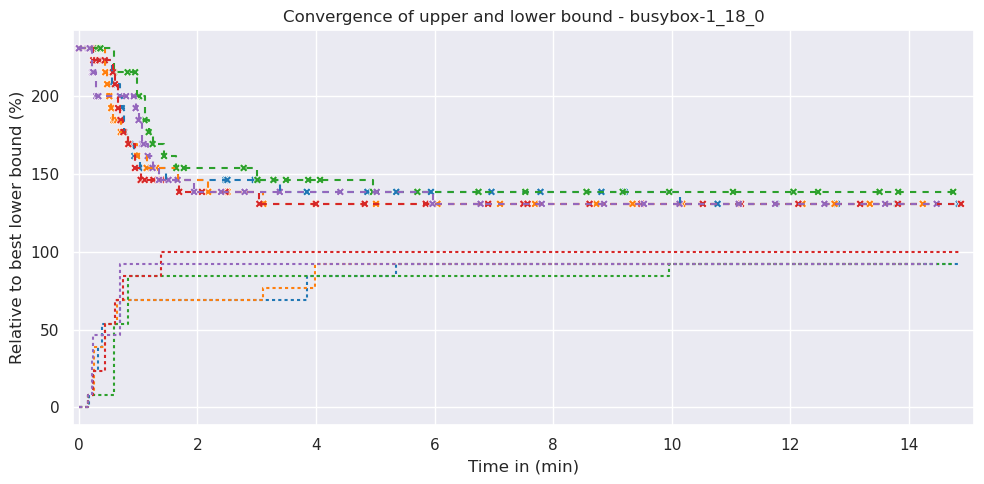

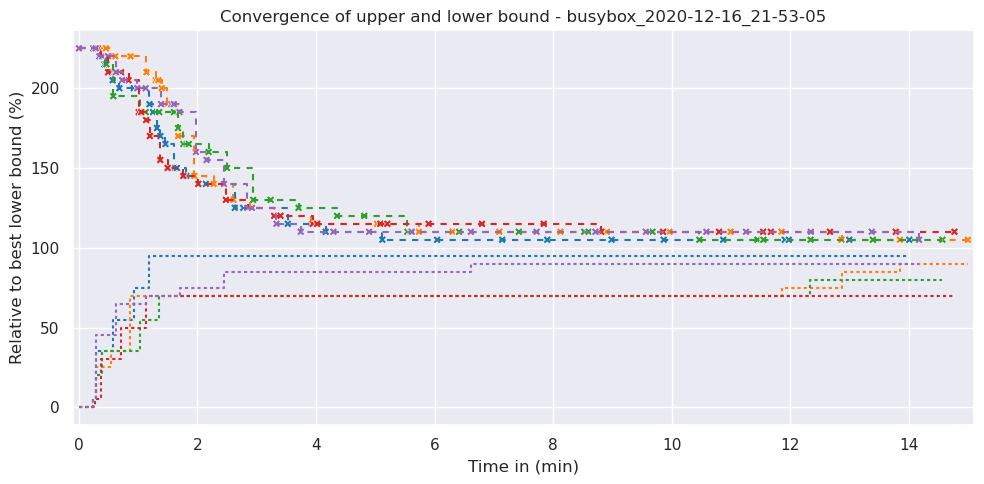

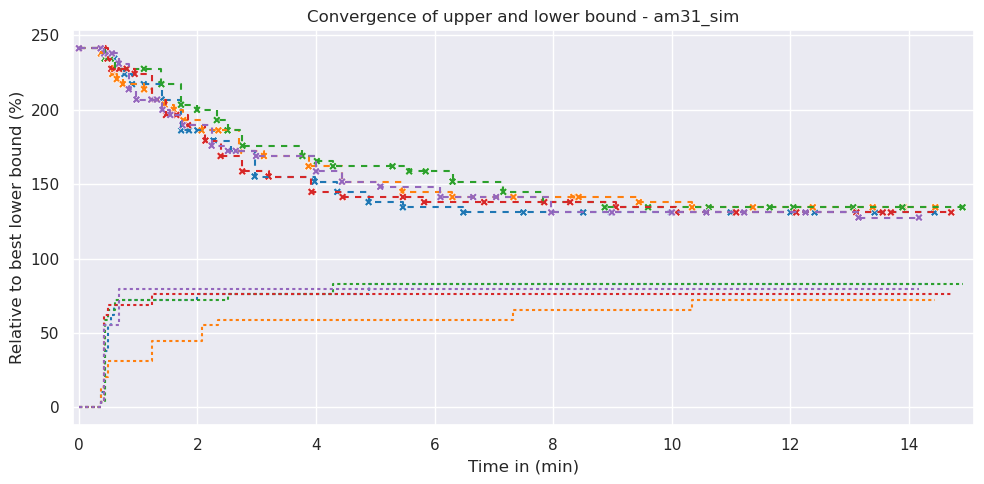

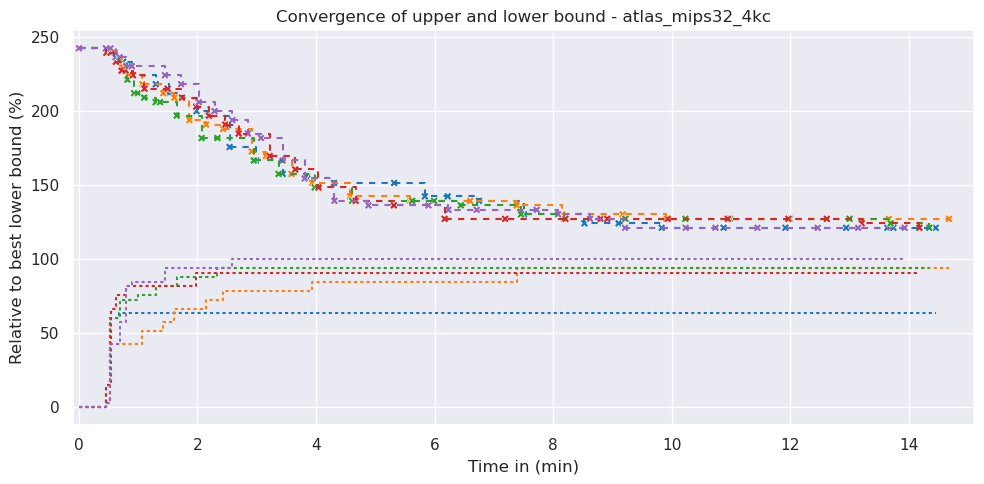

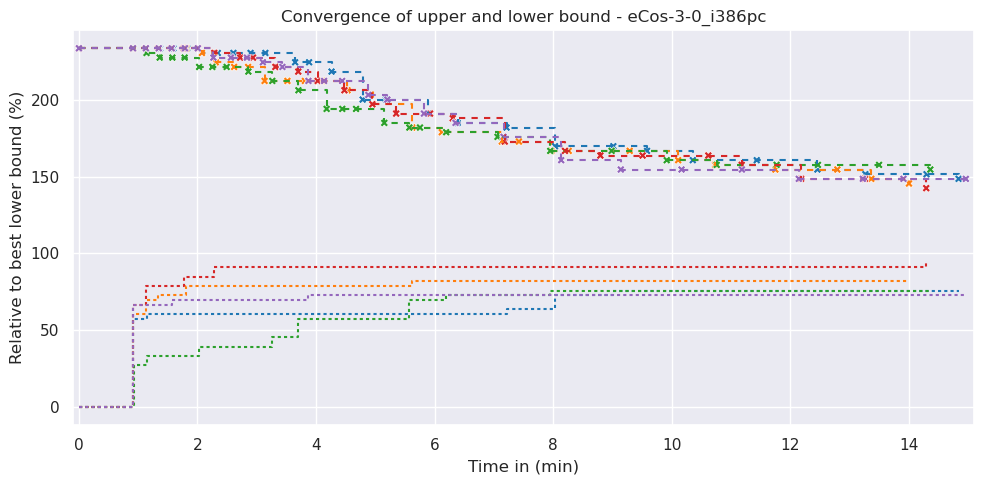

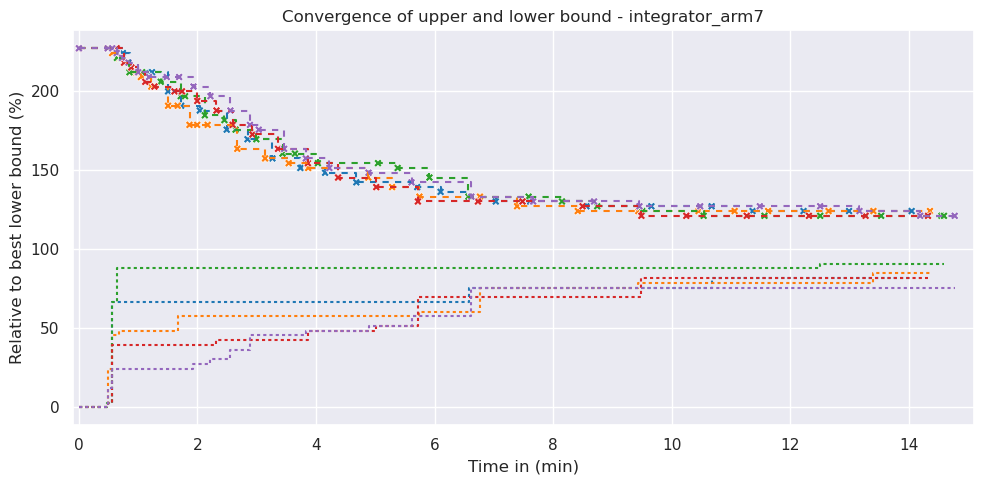

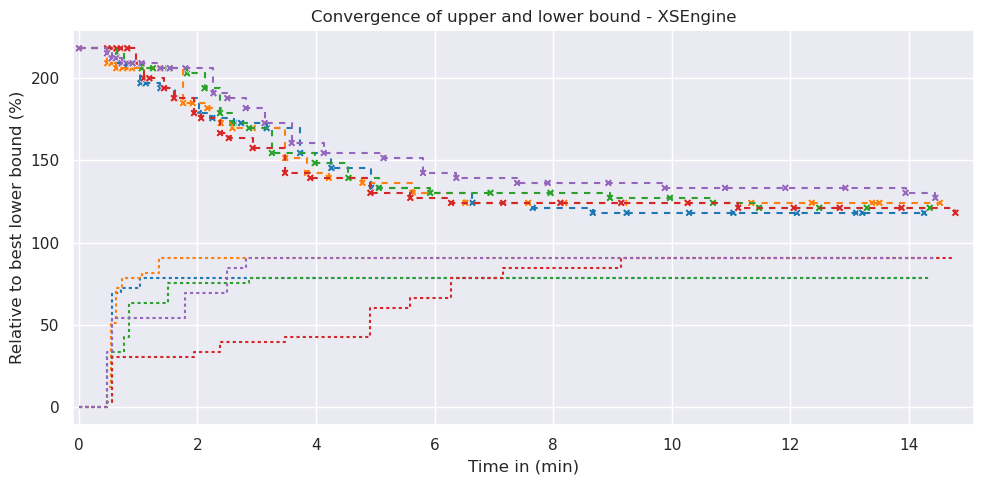

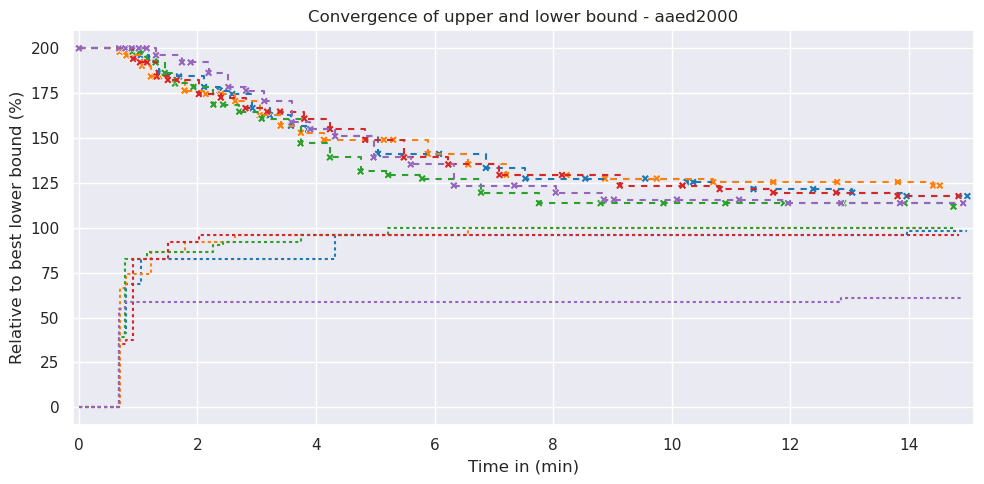

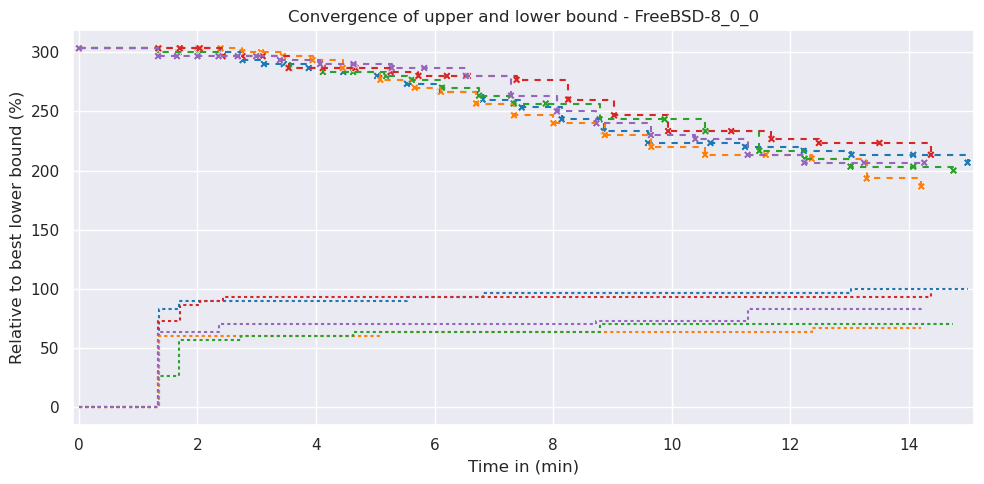

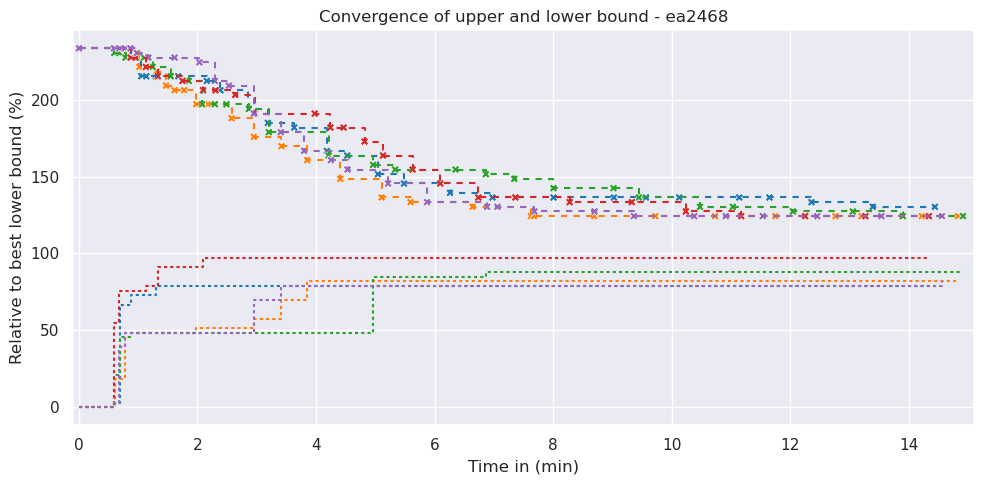

In [17]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=15.1,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [18]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance"].isin(selection)].drop_duplicates(subset=["instance"]).sort_values(
    by=["#Variables", "#Clauses"]
).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

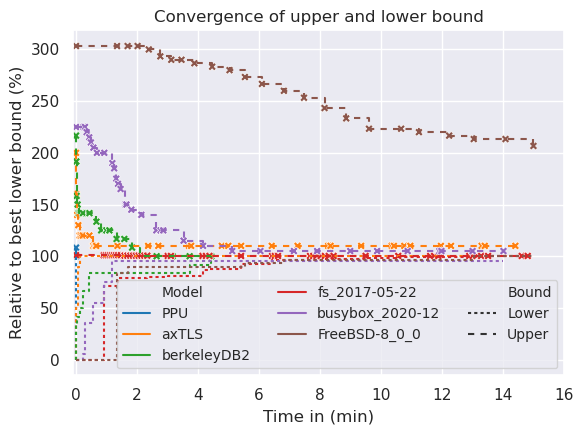

In [19]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=16)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [20]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                    type           
APL                         Lower  0.033325
                            Upper  0.010191
APL-Model                   Lower  0.467551
                            Upper  0.084497
BankingSoftware             Lower  0.315738
...                                     ...
soletta_2017-03-09_21-02-40 Upper  4.587638
toybox_2006-10-31_23-30-06  Lower  0.018809
                            Upper  0.034195
toybox_2020-12-06_00-02-46  Lower  2.212627
                            Upper  1.581705

[84 rows x 1 columns]

In [21]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    21
dtype: int64

In [22]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

,time
type,
Lower,3.248107
Upper,4.254960
